In [1]:
#Imports
import matplotlib.pyplot as plt
from numpy import arange, linspace, sqrt, sin, cos, pi, exp

Text(40.1, 0.50025, 'Captured')

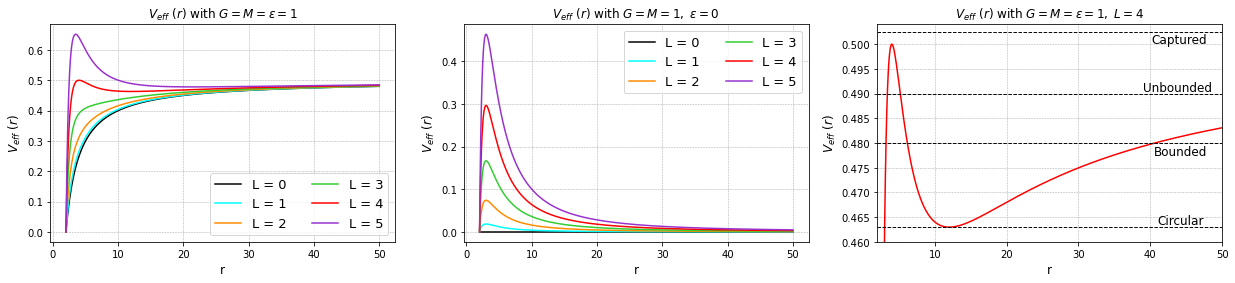

In [2]:
#Physical constants normalized
G = 1
M = 1


#Lists of epsilon e, angular momenta L, and radii
e_list = [0, 1]
r_list = linspace(2, 50, 1000)
L_list = [0, 1, 2, 3, 4, 5]


#Defining a function to evaluate V_eff(r) for given epsilon, radius, and momentum
def Veff(e, r, L):
    V = 0.5 * (1 - ((2*G*M) / r)) * (e + ((L**2) / (r**2)))
    return V


#Creating colormap and labels for the figures
colors = ['black', 'cyan', 'darkorange', 'limegreen', 'red', 'darkorchid']
labels = ['L = 0', 'L = 1', 'L = 2', 'L = 3', 'L = 4', 'L = 5']


#Plotting the figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (21, 4), gridspec_kw={'width_ratios': [1, 1, 1]})
ax1.set_xlabel('r', fontsize = 12)
ax1.set_ylabel('$V_{eff}\ (r)$', fontsize = 12)
ax1.set_title('$V_{eff}\ (r)$ with $G = M = \epsilon = 1$')
ax1.grid(color = 'darkgray', linewidth = 0.5, linestyle = 'dashed')
ax2.set_xlabel('r', fontsize = 12)
ax2.set_ylabel('$V_{eff}\ (r)$', fontsize = 12)
ax2.set_title('$V_{eff}\ (r)$ with $G = M = 1, \ \epsilon = 0$')
ax2.grid(color = 'darkgray', linewidth = 0.5, linestyle = 'dashed')
ax3.set_xlim(2, 50)
ax3.set_ylim(0.46, 0.504)
ax3.set_xlabel('r', fontsize = 12)
ax3.set_ylabel('$V_{eff}\ (r)$', fontsize = 12)
ax3.set_title('$V_{eff}\ (r)$ with $G = M = \epsilon = 1, \ L = 4$')
ax3.grid(color = 'darkgray', linewidth = 0.5, linestyle = 'dashed')
for index in range(len(L_list)):
    for e in e_list:
        V_list = []
        for r in r_list:
            V_list.append(Veff(e, r, L_list[index]))
        if e == 0:
            ax2.plot(r_list, V_list, linestyle = 'solid', color = colors[index], label = labels[index])
        else:
            if L_list[index] == 4:
                ax3.plot(r_list, V_list, linestyle = 'solid', color = 'red')
            ax1.plot(r_list, V_list, linestyle = 'solid', color = colors[index], label = labels[index])
ax1.legend(loc = 'lower right', ncol = 2, prop = {'size' : 13})
ax2.legend(loc = 'upper right', ncol = 2, prop = {'size' : 13})
ax3.axhline(0.4629, color = 'black', linestyle = 'dashed', linewidth = 0.95)
ax3.axhline(0.48, color = 'black', linestyle = 'dashed', linewidth = 0.95)
ax3.axhline(0.49, color = 'black', linestyle = 'dashed', linewidth = 0.95)
ax3.axhline(0.5025, color = 'black', linestyle = 'dashed', linewidth = 0.95)
ax3.text(41, 0.4635, 'Circular', fontsize = 12)
ax3.text(40.5, 0.4775, 'Bounded', fontsize = 12)
ax3.text(39, 0.4905, 'Unbounded', fontsize = 12)
ax3.text(40.1, 0.50025, 'Captured', fontsize = 12)

In [3]:
#Defining a class to convert & save trajectory points
class Trajectory:
    def __init__(self, r, phi, w, minstep=0.1):
        self.ds2 = minstep**2
        self.points = []
        self.vels = []
        self._append(r, phi, w) 

        
    def _append(self, r, phi, w):
        self.r, self.phi = r, phi
        # Position
        x, y = r * cos(phi), r * sin(phi)
        self.points.append([x, y]) 

        #Computing velocities
        rw = r * w
        dx = (-x * rw) - y
        dy = (-y * rw) + x
        ds = r * sqrt(1 + (rw**2))
        self.vels.append([dx / ds, dy / ds])      

        
    #Adding a point to the list if it's at least
    #minstep from the previous point
    def add(self, r, phi, w, force=False):
        if not force:
            dr = r - self.r
            dphi = phi - self.phi
            ds2 = (dr**2) + ((r * dphi)**2)
            if ds2 < self.ds2:
                return
        self._append(r, phi, w) 

In [4]:
#Defining a function to return our geodesic equation for photons
def acc(u):
    return (1.5 * (u**2)) - u


#Defining a function to compute the 4th order Yoshida coefficients
def coefficients():
    a = 2 - (2**(1/3))    #denominator of w0, w1
    w0 = -(2**(1/3)) / a  #d2 = w0
    w1 = 1 / a            #d1 = d3 = w1
    c1 = w1 / 2           #c4 = c1
    c2 = (w0 + w1) / 2    #c3 = c2
    return (c1, c2, c2, c1), (w1, w0, w1)


#Defining a function to compute the 4th order Yoshida integrator
def yoshida4(phi, u, w, dphi, numsteps):
    yc, yd = coefficients()
    u0 = u
    traj = Trajectory(1/u, phi, w)                  
                                                    
    for i in range(1, numsteps + 1):                                                                                     
        phi += dphi                                 
        for c, d in zip(yc, yd):                 
            u += c * w * dphi
            w += d * acc(u) * dphi
        u += yc[-1] * w * dphi
        
        final = i == numsteps or (i % 2 == 0 and not u0 <= u < 100)
        traj.add(1/u, phi, w, force = final)
        if final:
            break
            
    return traj.points, traj.vels, i

Text(0.5, 1.0, 'Photon Orbits with $\\delta$ > 0')

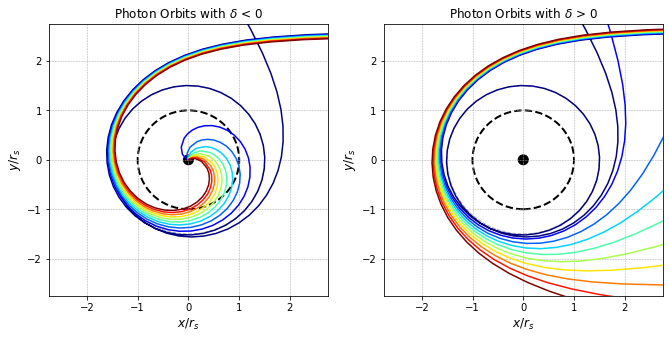

In [5]:
#List of delta values to evaluate photon orbit
delta_list = linspace(0, 0.1, 10)


#Initial Conditions
d2r = pi / 180           #degrees to radians
b0 = sqrt(27) / 2        #impact parameter
phi0 = 20                #initial angle of photon
maxsteps = 100           #max number of steps
angle = 900              #final angle of photon
phi = phi0 * d2r         #convert phi0 to radians      
step = angle / maxsteps  #step size
dp = step * d2r          #step size of phi


#Creating colormap for the figures
n = len(delta_list)
colors = plt.cm.jet(linspace(0 ,1 , n))


#Plotting the figures
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize = (11,5))
ax1.set_xlim(-2.75, 2.75)
ax1.set_ylim(-2.75, 2.75)
ax1.grid(color = 'darkgray', linewidth = 0.5, linestyle = 'dashed')
ax2.set_xlim(-2.75, 2.75)
ax2.set_ylim(-2.75, 2.75)
ax2.grid(color = 'darkgray', linewidth = 0.5, linestyle = 'dashed')
for index in range(len(delta_list)):
    #setting initial x and y lists to plot - x1,y1 = delta < 0, x2,y2 = delta > 0
    x1_list = []
    y1_list = []
    x2_list = []
    y2_list = []
    b1, b2 = b0 - delta_list[index], b0 + delta_list[index]       #initial y coordinate
    r1, r2 = b1 / sin(phi), b2 / sin(phi)                         #initial radius
    u1, u2 = 1 / r1, 1 / r2                                       #initial inverse radius
    w1 = sqrt((1 / (b1**2)) - ((u1**2) * (1 - u1)))               #initial velocity
    w2 = sqrt((1 / (b2**2)) - ((u2**2) * (1 - u2)))               #initial velocity
    pts1, vels1, numsteps1 = yoshida4(phi, u1, w1, dp, maxsteps)  #return integration
    pts2, vels2, numsteps2 = yoshida4(phi, u2, w2, dp, maxsteps)  #return integration
    for points in pts1:
        x1_list.append(points[0])  #separating pts1 into x and y lists
        y1_list.append(points[1])
    for points in pts2:
        x2_list.append(points[0])  #separating pts2 into x and y lists
        y2_list.append(points[1])
    ax1.plot(x1_list, y1_list, color = colors[index])  #plotting each photon trajectory on x-y plane with delta < 0
    ax2.plot(x2_list, y2_list, color = colors[index])  #plotting each photon trajectory on x-y plane with delta > 0
ax1.add_patch(plt.Circle((0, 0), 0.1, color = 'black'))  #add Schwarzschild black hole
ax1.add_patch(plt.Circle((0, 0), 1, color = 'black', linestyle = 'dashed', linewidth = 2.0, fill = False))  #add event horizon
ax1.add_patch(plt.Circle((0, 0), 1.5, color = 'darkgrey', linestyle = 'dashed', fill = False))  #add circular orbit
ax2.add_patch(plt.Circle((0, 0), 0.1, color = 'black'))  #add Schwarzschild black hole
ax2.add_patch(plt.Circle((0, 0), 1, color = 'black', linestyle = 'dashed', linewidth = 2.0, fill = False))  #add event horizon
ax2.add_patch(plt.Circle((0, 0), 1.5, color = 'darkgrey', linestyle = 'dashed', fill = False))  #add circular orbit
ax1.set_xlabel('$x/r_s$', fontsize = 12)
ax1.set_ylabel('$y/r_s$', fontsize = 12)
ax1.set_title('Photon Orbits with $\delta$ < 0')
ax2.set_xlabel('$x/r_s$', fontsize = 12)
ax2.set_ylabel('$y/r_s$', fontsize = 12)
ax2.set_title('Photon Orbits with $\delta$ > 0')

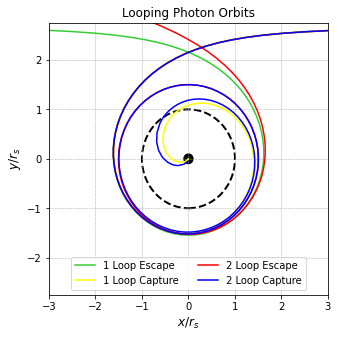

In [6]:
#List of delta values to evaluate photon orbit
delta0 = 0.003349145847
delta_list = [delta0, -delta0, delta0 * (exp(-2 * pi)), -delta0 * (exp(-2 * pi))]


#Initial Conditions
d2r = pi / 180           #degrees to radians
b0 = sqrt(27) / 2        #impact parameter
phi0 = 40                #initial angle of photon
maxsteps = 160           #max number of steps
angle = 920              #final angle of photon
phi = phi0 * d2r         #convert phi0 to radians      
step = angle / maxsteps  #step size
dp = step * d2r          #step size of phi


#Creating colormap and labels for the figures
colors = ['limegreen', 'yellow', 'red', 'blue']
labels = ['1 Loop Escape', '1 Loop Capture', '2 Loop Escape', '2 Loop Capture']


#Plotting the figures
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlim(-3, 3)
ax.set_ylim(-2.75, 2.75)
ax.grid(color = 'darkgray', linewidth = 0.5, linestyle = 'dashed')
for index in range(len(delta_list)):
    #setting initial x and y lists to plot
    x_list = []
    y_list = []
    b = b0 + delta_list[index]  #initial y coordinate
    r = b / sin(phi)            #initial radius
    u = 1 / r                   #initial inverse radius
    w = sqrt((1 / (b**2)) - ((u**2) * (1 - u)))              #initial velocity
    pts, vels, numsteps = yoshida4(phi, u, w, dp, maxsteps)  #return integration
    for points in pts:
        x_list.append(points[0])  #separating pts into x and y lists
        y_list.append(points[1])
    ax.plot(x_list, y_list, color = colors[index], label = labels[index])  #plotting each photon trajectory on x-y plane
ax.add_patch(plt.Circle((0, 0), 0.1, color = 'black'))  #add Schwarzschild black hole
ax.add_patch(plt.Circle((0, 0), 1, color = 'black', linestyle = 'dashed', linewidth = 2.0, fill = False))  #add event horizon
ax.add_patch(plt.Circle((0, 0), 1.5, color = 'darkgrey', linestyle = 'dashed', fill = False))  #add circular orbit
ax.set_xlabel('$x/r_s$', fontsize = 12)
ax.set_ylabel('$y/r_s$', fontsize = 12)
ax.set_title('Looping Photon Orbits')
ax.legend(loc = 'lower center', ncol = 2)